In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [15, 10]

In [5]:
rng = np.random.RandomState(42)

X_train = 0.2*rng.randn(1000, 2)
X_train = np.r_[X_train+3, X_train]
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])

X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

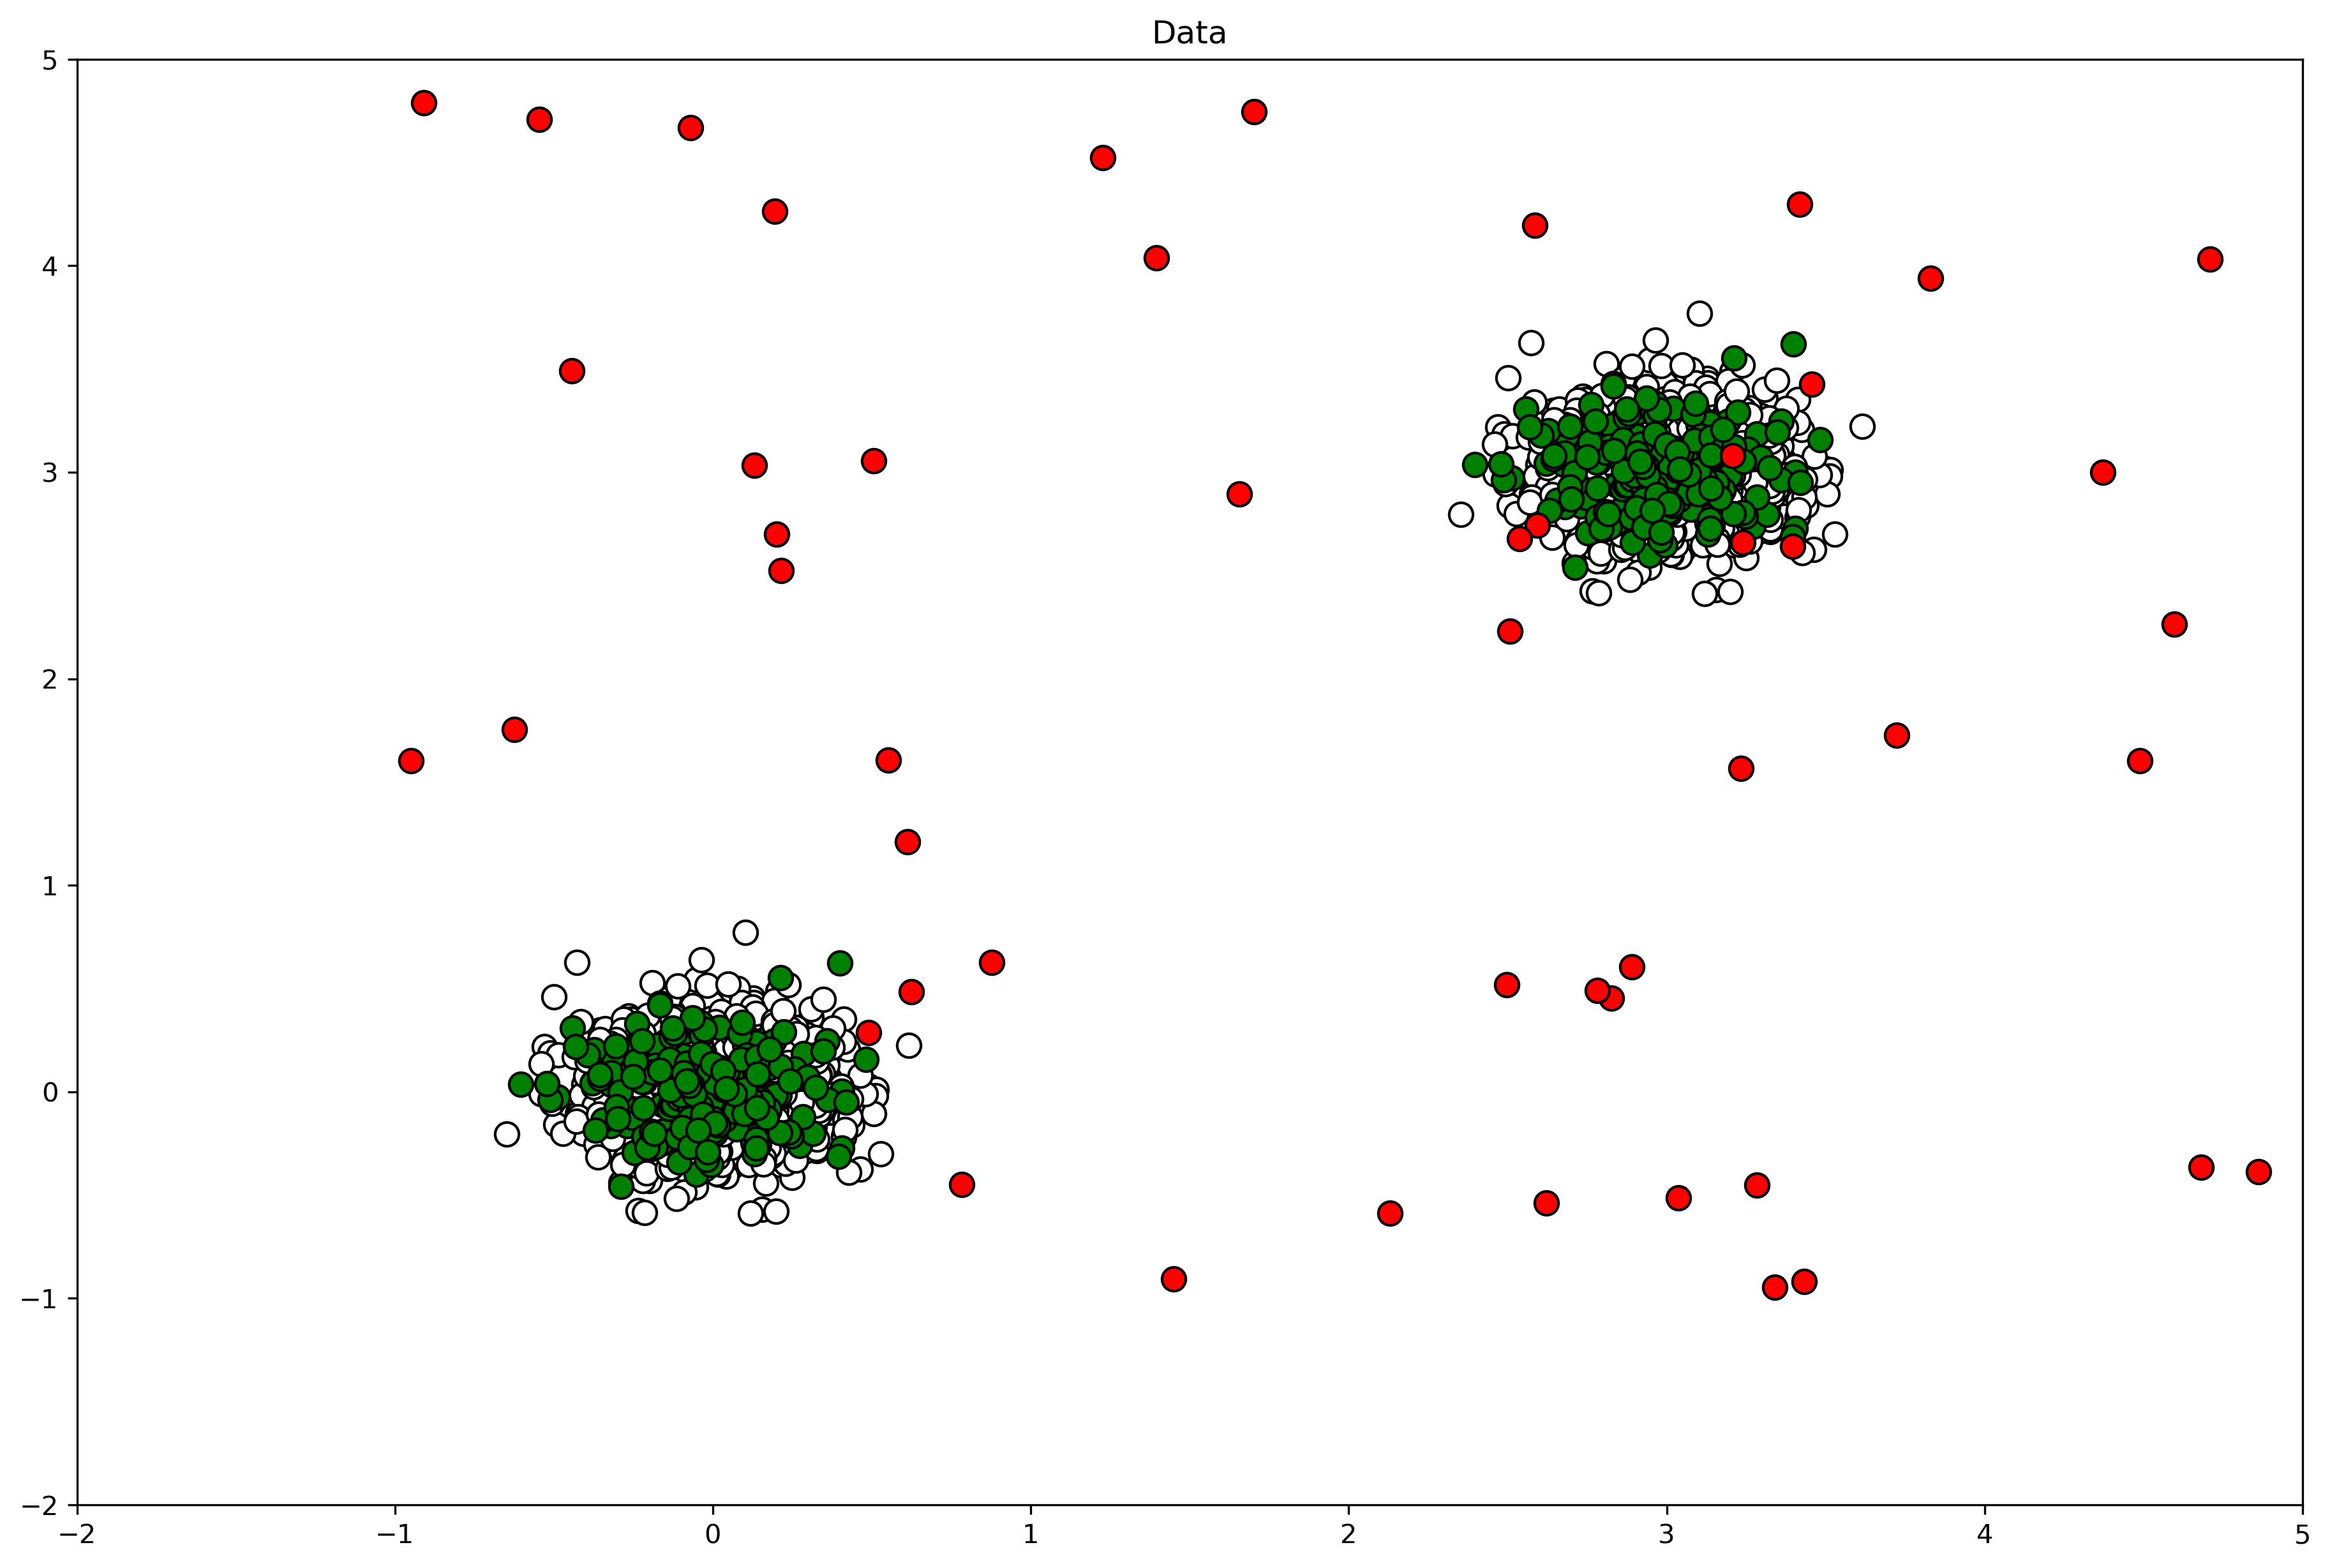

In [6]:
p1 = plt.scatter(X_train.x1, X_train.x2, c = 'white', s = 20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c = 'g', s = 20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c = 'r', s = 20*4, edgecolor='k')

plt.title('Data')
plt.axis('tight')
plt.xlim(-2, 5)
plt.ylim(-2,5)

plt.savefig('dataset_generated.png', dpi = 300)
plt.show()

In [7]:
model = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
model.fit(X_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1,
        random_state=<mtrand.RandomState object at 0x103fac8b8>, verbose=0)

In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_outliers = model.predict(X_outliers)

In [9]:
print("Accuracy : ", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy :  0.93


In [10]:
print("Accuracy : ", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy :  0.96


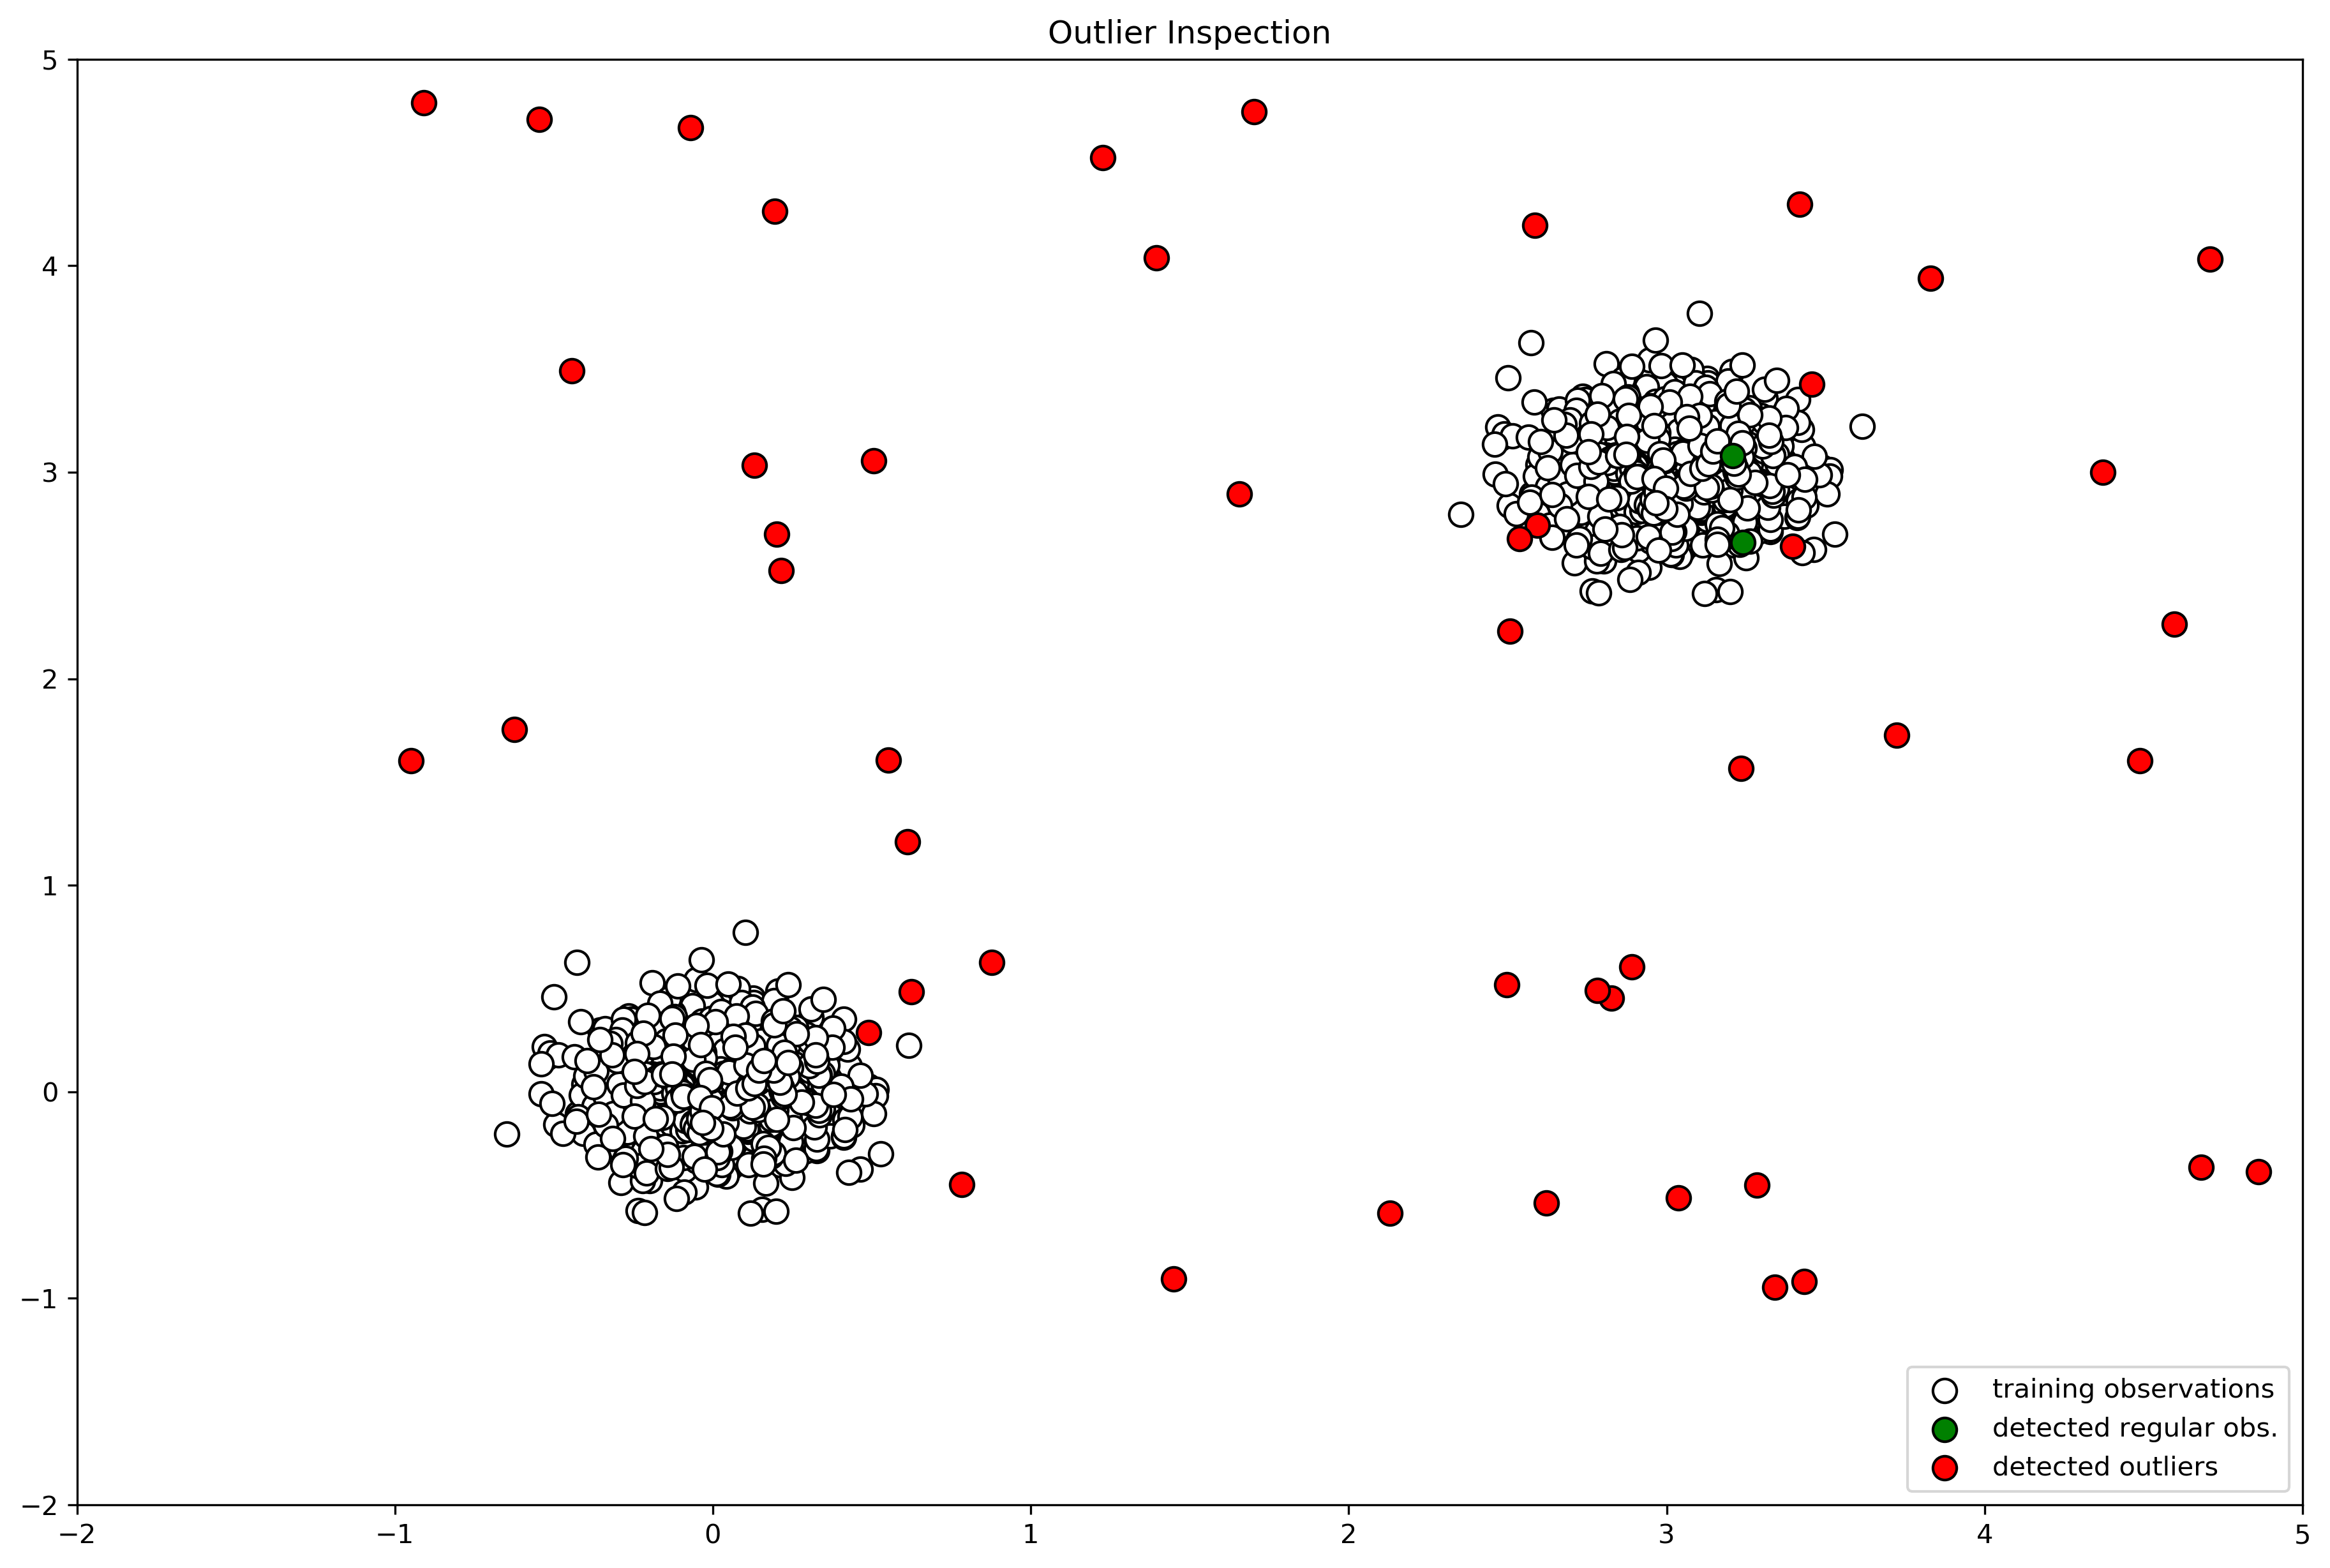

In [23]:
plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')

for i in range(X_outliers.shape[0]):
    if y_pred_outliers[i]==-1:
        plt.scatter(X_outliers[i:i+1].x1, X_outliers[i:i+1].x2, c='r', s=20*4, edgecolor='k')
    else :
        plt.scatter(X_outliers[i:i+1].x1, X_outliers[i:i+1].x2, c='g',s = 20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
          ["training observations",
           "detected regular obs.", 
           "detected outliers"],
          loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()
